In [1]:
from lib_sections import dict_to_graph
from lib_model import LibModel
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
df = pd.read_csv('data/20230413_clb_taps.csv')
# df['Datetime'] = pd.to_datetime(df['Datetime'])
# entry_df = df.set_index('Datetime')
# entry_df = entry_df[entry_df['Direction']=='Entry']['Direction'].resample('10min',  label='left').count().reset_index()
# entry_df.columns = ['timestamp', 'entry_counts']
# entry_df

In [3]:
import json
# Opening JSON file
lib_sections_file = open('static/lib_sections.json')
lib_sections = json.load(lib_sections_file)
sections_attrs_file = open('static/sections_attrs.json')
sections_attrs = json.load(sections_attrs_file)
connections_file = open('static/connections.json')
connections = json.load(connections_file)

In [4]:
lib_graph = dict_to_graph(lib_sections, sections_attrs, connections)
lib_graph

In [5]:
model = LibModel(df, lib_graph)
model.run()
results = model.datacollector.get_model_vars_dataframe()
# results['timestamp'] = entry_df['timestamp']
# sns.lineplot(results, x='timestamp', y='num_agents')

NameError: name 'entry_df' is not defined

<AxesSubplot: >

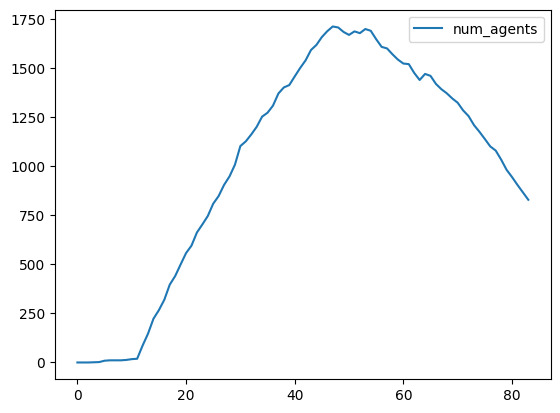

In [8]:
sns.lineplot(results)

In [7]:
results2 = model.datacollector.get_table_dataframe("SectionsData")
results2['utilization_rate'] = 1-results2['empty_seats']/results2['capacity']
results2

,timestamp,section,level,capacity,empty_seats,utilization_rate
0,2023-04-12 22:50:00+00:00,clb_3-movable_seat,clb_3,100,100,0.000
1,2023-04-12 22:50:00+00:00,clb_3-4_man_seat,clb_3,50,50,0.000
2,2023-04-12 22:50:00+00:00,clb_3-8_man_seat,clb_3,100,100,0.000
3,2023-04-12 22:50:00+00:00,clb_3-window_seat,clb_3,100,100,0.000
4,2023-04-12 22:50:00+00:00,clb_3-sofa,clb_3,100,100,0.000
...,...,...,...,...,...,...
3775,2023-04-13 12:40:00+00:00,wbs_6-sofa,wbs_6,100,81,0.190
3776,2023-04-13 12:40:00+00:00,wbs_6-soft_seat,wbs_6,100,68,0.320
3777,2023-04-13 12:40:00+00:00,wbs_6-cubicle,wbs_6,40,25,0.375
3778,2023-04-13 12:40:00+00:00,wbs_6-discussion_cubicle,wbs_6,40,29,0.275


In [ ]:
results2['section'].unique()

array(['clb_3-movable_seat', 'clb_3-4_man_seat', 'clb_3-8_man_seat',
       'clb_3-window_seat', 'clb_3-sofa', 'clb_3-soft_seat',
       'clb_3-cubicle', 'clb_3-discussion_cubicle', 'clb_3-diagonal_seat',
       'clb_4-movable_seat', 'clb_4-4_man_seat', 'clb_4-8_man_seat',
       'clb_4-window_seat', 'clb_4-sofa', 'clb_4-soft_seat',
       'clb_4-cubicle', 'clb_4-discussion_cubicle', 'clb_4-diagonal_seat',
       'clb_5-movable_seat', 'clb_5-4_man_seat', 'clb_5-8_man_seat',
       'clb_5-window_seat', 'clb_5-sofa', 'clb_5-soft_seat',
       'clb_5-cubicle', 'clb_5-discussion_cubicle', 'clb_5-diagonal_seat',
       'clb_6-movable_seat', 'clb_6-4_man_seat', 'clb_6-8_man_seat',
       'clb_6-window_seat', 'clb_6-sofa', 'clb_6-soft_seat',
       'clb_6-cubicle', 'clb_6-discussion_cubicle', 'clb_6-diagonal_seat',
       'wbs_6-movable_seat', 'wbs_6-4_man_seat', 'wbs_6-8_man_seat',
       'wbs_6-window_seat', 'wbs_6-sofa', 'wbs_6-soft_seat',
       'wbs_6-cubicle', 'wbs_6-discussion_cubicle'

<AxesSubplot: xlabel='timestamp', ylabel='utilization_rate'>

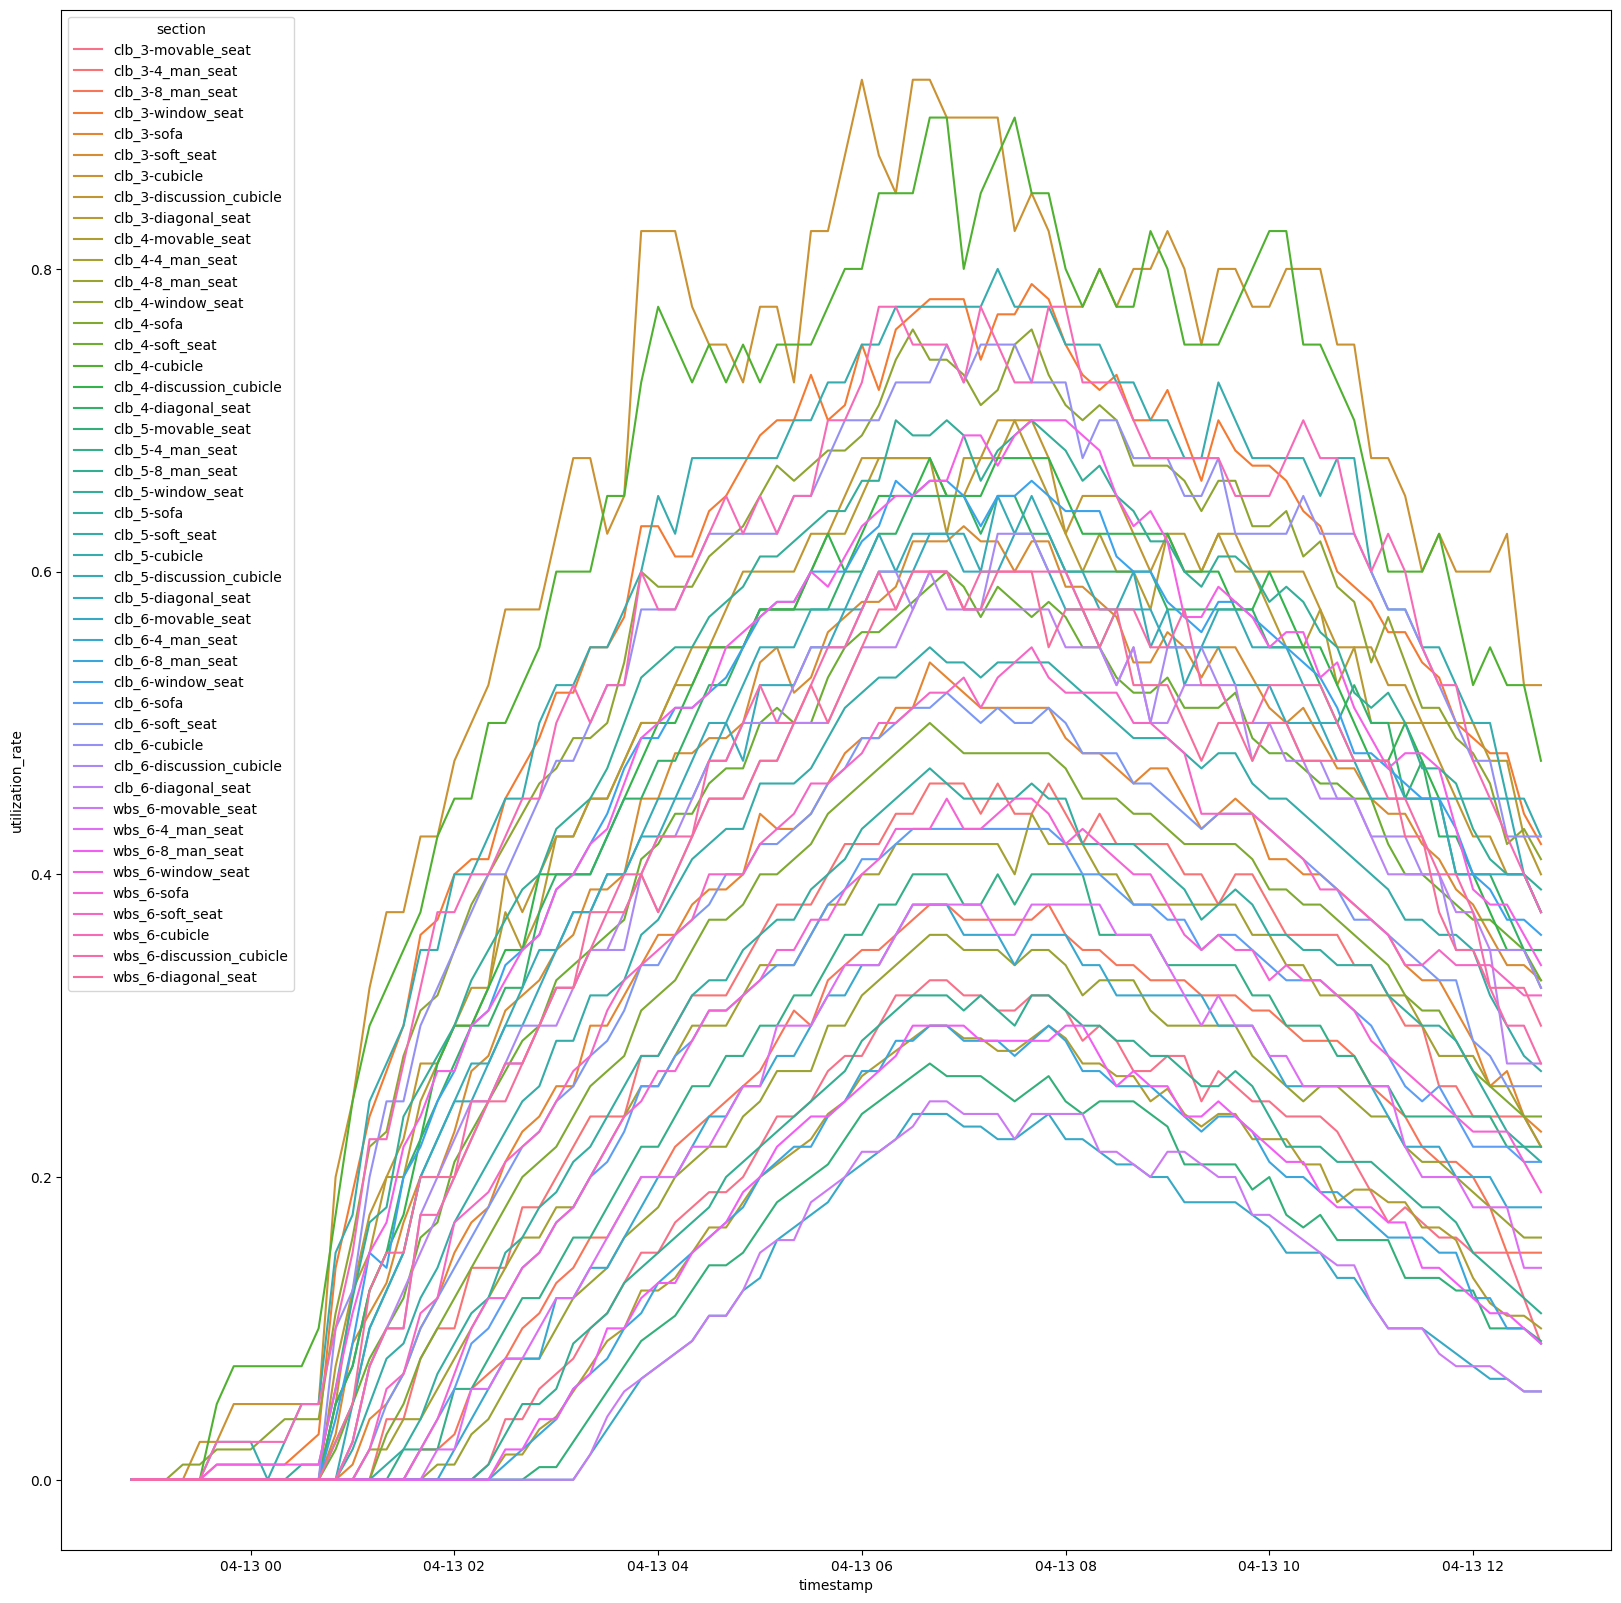

In [23]:
plt.figure(figsize=(20,20))
sns.lineplot(results2, x='timestamp', y='utilization_rate', hue='section')

<AxesSubplot: xlabel='timestamp', ylabel='utilization_rate'>

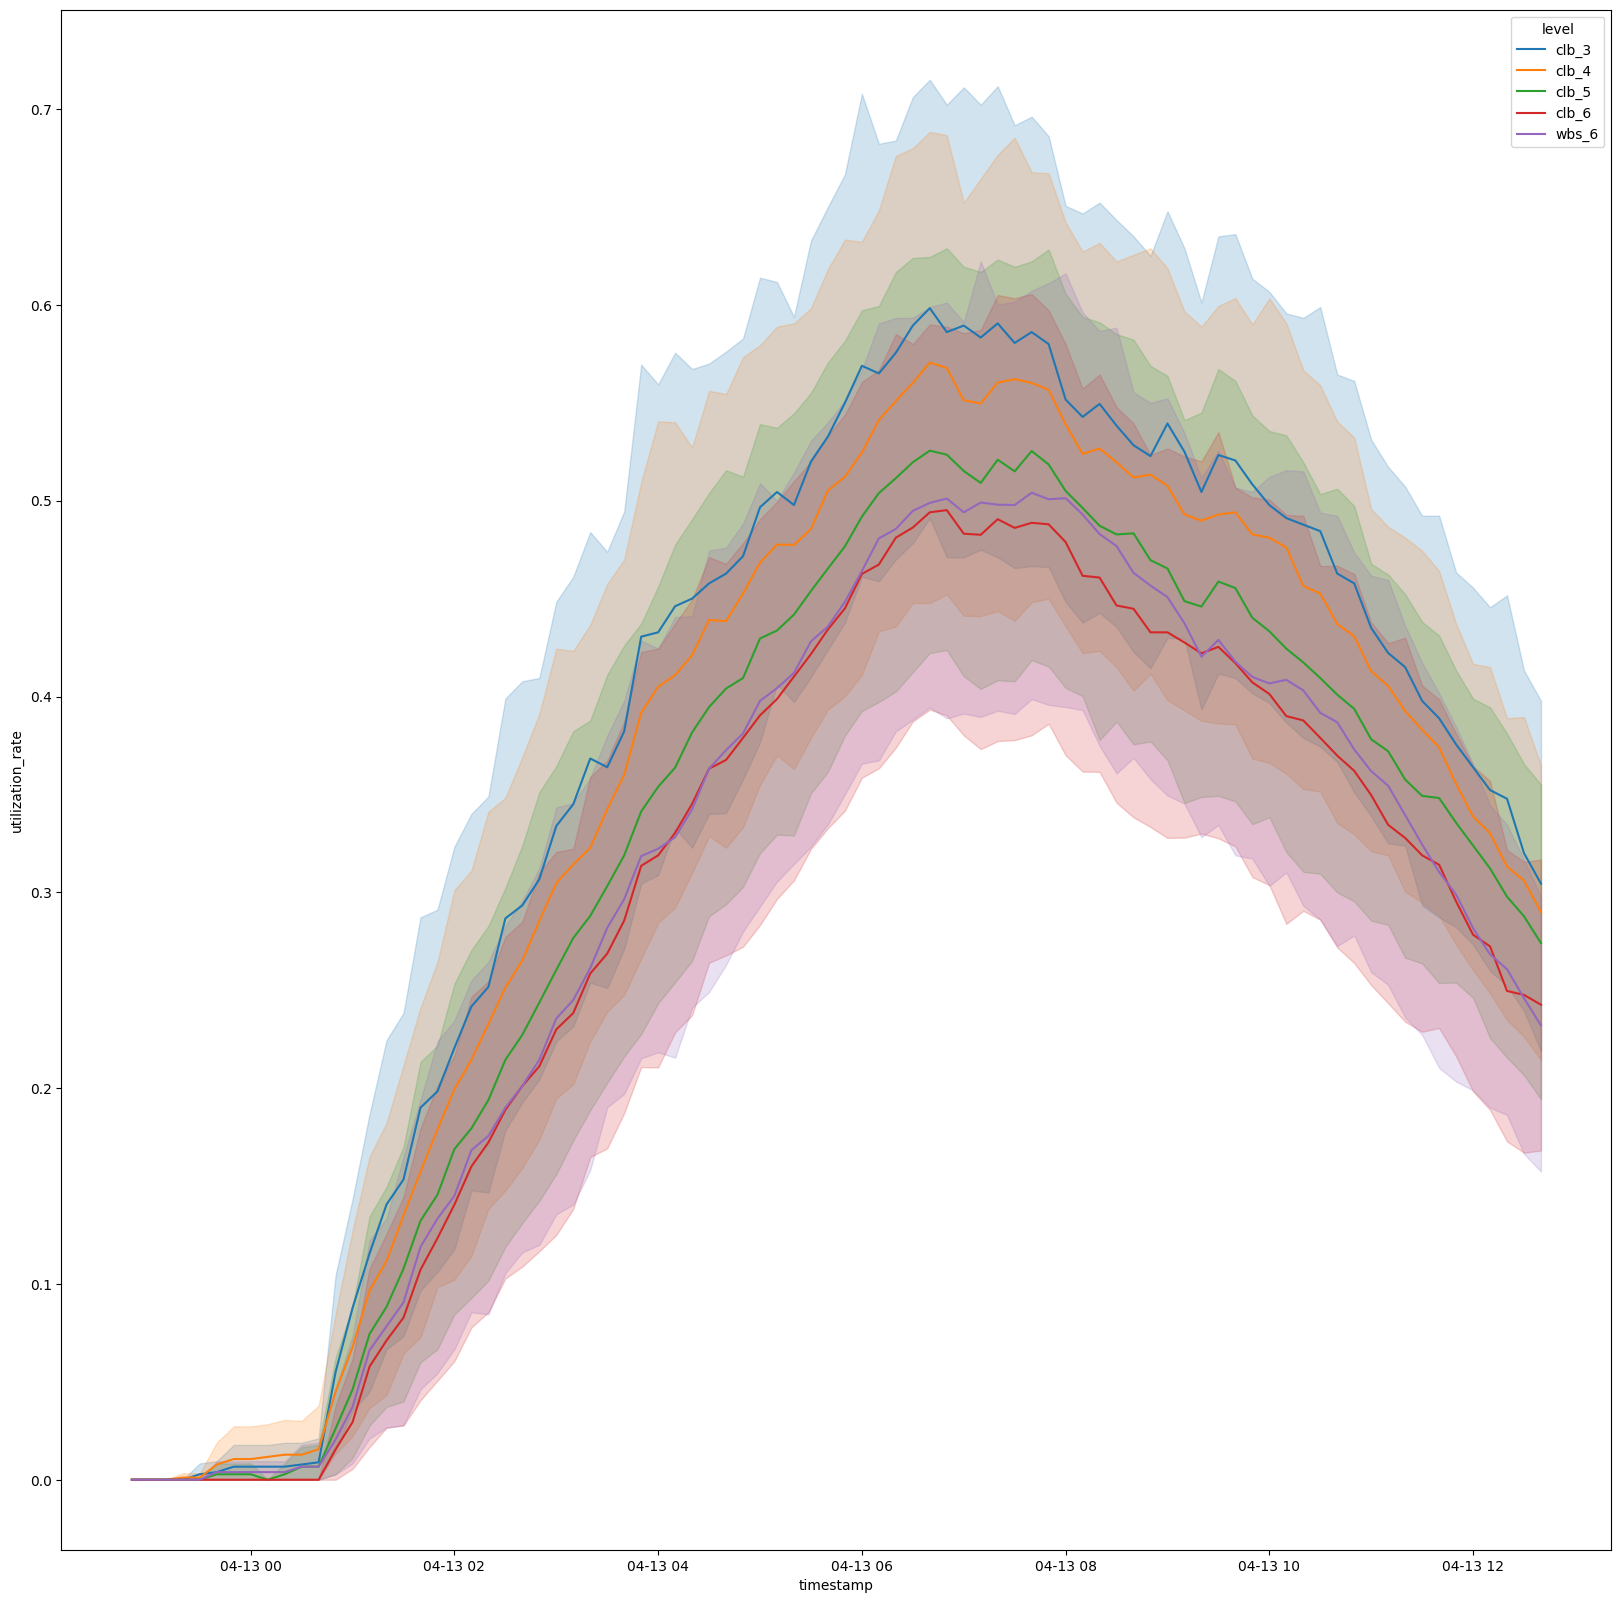

In [24]:
plt.figure(figsize=(20,20))
sns.lineplot(results2, x='timestamp', y='utilization_rate', hue='level')

In [11]:
agents = model.datacollector.get_agent_vars_dataframe()
agents

chosen_seat  satisfaction
Step AgentID                                   
3    3-0        clb_4-window_seat      3.580014
4    3-0        clb_4-window_seat      3.580014
     4-0            clb_3-cubicle      3.443346
5    3-0        clb_4-window_seat      3.580014
     4-0            clb_3-cubicle      3.443346
...                           ...           ...
83   83-1              clb_3-sofa      3.148629
     83-2     clb_3-diagonal_seat      3.057736
     83-3           wbs_6-cubicle      3.143623
     83-4           clb_4-cubicle      3.325648
     83-5       clb_4-window_seat      3.202774

[85058 rows x 2 columns]

In [12]:
agents['satisfaction'].describe()

count    85058.000000
mean         3.067304
std          0.153755
min          2.751054
25%          2.957836
50%          3.035804
75%          3.149075
max          3.680378
Name: satisfaction, dtype: float64

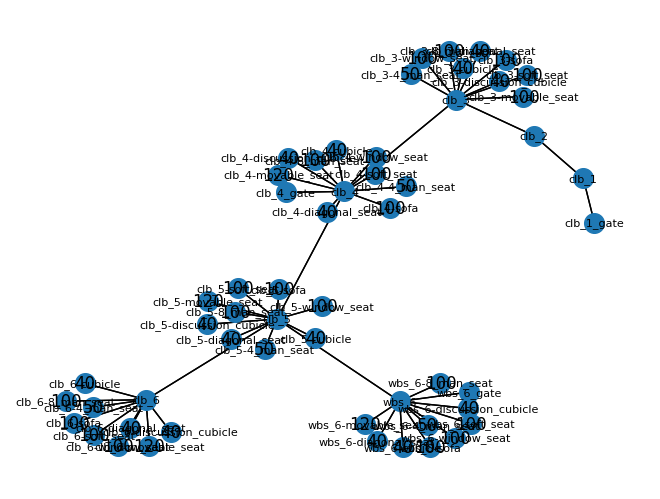

{'clb_3-movable_seat': 100,
 'clb_3-4_man_seat': 50,
 'clb_3-8_man_seat': 100,
 'clb_3-window_seat': 100,
 'clb_3-sofa': 100,
 'clb_3-soft_seat': 100,
 'clb_3-cubicle': 40,
 'clb_3-discussion_cubicle': 40,
 'clb_3-diagonal_seat': 40,
 'clb_4-movable_seat': 120,
 'clb_4-4_man_seat': 50,
 'clb_4-8_man_seat': 100,
 'clb_4-window_seat': 100,
 'clb_4-sofa': 100,
 'clb_4-soft_seat': 100,
 'clb_4-cubicle': 40,
 'clb_4-discussion_cubicle': 40,
 'clb_4-diagonal_seat': 40,
 'clb_5-movable_seat': 120,
 'clb_5-4_man_seat': 50,
 'clb_5-8_man_seat': 100,
 'clb_5-window_seat': 100,
 'clb_5-sofa': 100,
 'clb_5-soft_seat': 100,
 'clb_5-cubicle': 40,
 'clb_5-discussion_cubicle': 40,
 'clb_5-diagonal_seat': 40,
 'clb_6-movable_seat': 120,
 'clb_6-4_man_seat': 50,
 'clb_6-8_man_seat': 100,
 'clb_6-window_seat': 100,
 'clb_6-sofa': 100,
 'clb_6-soft_seat': 100,
 'clb_6-cubicle': 40,
 'clb_6-discussion_cubicle': 40,
 'clb_6-diagonal_seat': 40,
 'wbs_6-movable_seat': 120,
 'wbs_6-4_man_seat': 50,
 'wbs_6-8_m

In [13]:
# Create a layout for the nodes
pos = nx.spring_layout(model.library_graph)

# Extract capacities into a dictionary for nodes that have the 'capacity' attribute
capacities = {node: model.library_graph.nodes[node]['capacity'] for node in model.library_graph.nodes if 'capacity' in model.library_graph.nodes[node]}

# Draw the nodes with labels
nx.draw(model.library_graph, pos, with_labels=True, node_size=200, font_size=8)

# Draw the edges
nx.draw_networkx_edges(model.library_graph, pos)

# Label nodes with their capacities
nx.draw_networkx_labels(model.library_graph, pos, labels=capacities)

# Show the graph
plt.show()
capacities